In [2]:
'''
In this programming, we want to compare the pace change nearly every 5k and try to get some conclusion 
about how runners should adjust their pace to win the Marathon with more possibility.

Some feature:

Results are in minutes
Time for each splits of nearly 5km

The first plot is 'Pace change between 2015-2017', and from this plot we can see that both males and 
females' pace change is steady, after 25K to 35K, runners' pace change more violently which may related 
to the topography reason that Boston Marathon route is steady in the first half and really curve and 
twisting in the second half, and there’s a famous “Heartbreak Hill” which starts at around the 32 
Kilometre mark. One interesting point is that through our data analysis, we can see that from 35K to 
Final, females' pace change reduced while males' pace change increased which we infer that maybe males
just use all their power at the beginning of their run and so when they close to the final, they just do 
not have enough energy to spurt.

The second plot is 'All runners pace change during three years' which we can obviously see that runners
perform better in 2015 which we infer may related to the weather because the weather in 2015 Marathon 
was colder and maybe colder weather can produce better performance for Marathon.
'''

#import
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [80]:
#change time string to minites
def time_to_min(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1

In [81]:
#load data
time15 = pd.read_csv('marathon_results_2015.csv')
time16 = pd.read_csv('marathon_results_2016.csv')
time17 = pd.read_csv('marathon_results_2017.csv')

In [82]:
df = time15
df['5K_mins'] = df['5K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K_mins'] - df['5K_mins'] 
df['15K_mins'] = df['15K'].apply(lambda x: time_to_min(x))
df['15K_mins'] = df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Half_mins'] = df['Half'].apply(lambda x: time_to_min(x))
df['Half_mins'] = df['Half_mins'] - df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['20K_mins'] = df['20K'].apply(lambda x: time_to_min(x))
df['20K_mins'] = df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['25K_mins'] = df['25K'].apply(lambda x: time_to_min(x))
df['25K_mins'] = df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['30K_mins'] = df['30K'].apply(lambda x: time_to_min(x))
df['30K_mins'] = df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['35K_mins'] = df['35K'].apply(lambda x: time_to_min(x))
df['35K_mins'] = df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Final_mins'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['Final_mins'] = df['Final_mins'] - df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Pace'] = df['Pace'].apply(lambda x: time_to_min(x))
df['5K_pace'] = df['5K_mins']*0.322 # change the parameter from mile to km
df['10K_pace'] = df['10K_mins']*0.322
df['15K_pace'] = df['15K_mins']*0.322
df['20K_pace'] = df['20K_mins']*0.322
df['Half_pace'] = df['Half_mins']*0.264
df['25K_pace'] = df['25K_mins']*0.322
df['30K_pace'] = df['30K_mins']*0.322
df['35K_pace'] = df['35K_mins']*0.322
df['Final_pace'] = df['Final_mins']*0.224

In [83]:
#clean data 
time15.dropna(subset=['M/F'], inplace=True)
notblank15 = time15["M/F"].notnull() #clean M/F data
male15 = (time15["M/F"] == "M")
filter_male15 = time15[male15 & notblank15] #data for male
female15 = (time15["M/F"] == "F")
filter_female15 = time15[female15 & notblank15] #data for female
columns = ['5K_pace','10K_pace','15K_pace','Half_pace','25K_pace','30K_pace','35K_pace','Final_pace']
female15 = filter_female15[:100]
avg_f15 = female15[columns].mean()
male15 = filter_male15[:100]
avg_m15 = male15[columns].mean()
avg_all15 = time15[columns].mean()

In [84]:
df = time16
df['5K_mins'] = df['5K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K_mins'] - df['5K_mins'] 
df['15K_mins'] = df['15K'].apply(lambda x: time_to_min(x))
df['15K_mins'] = df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Half_mins'] = df['Half'].apply(lambda x: time_to_min(x))
df['Half_mins'] = df['Half_mins'] - df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['20K_mins'] = df['20K'].apply(lambda x: time_to_min(x))
df['20K_mins'] = df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['25K_mins'] = df['25K'].apply(lambda x: time_to_min(x))
df['25K_mins'] = df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['30K_mins'] = df['30K'].apply(lambda x: time_to_min(x))
df['30K_mins'] = df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['35K_mins'] = df['35K'].apply(lambda x: time_to_min(x))
df['35K_mins'] = df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Final_mins'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['Final_mins'] = df['Final_mins'] - df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Pace'] = df['Pace'].apply(lambda x: time_to_min(x))
df['5K_pace'] = df['5K_mins']*0.322
df['10K_pace'] = df['10K_mins']*0.322
df['15K_pace'] = df['15K_mins']*0.322
df['20K_pace'] = df['20K_mins']*0.322
df['Half_pace'] = df['Half_mins']*0.264
df['25K_pace'] = df['25K_mins']*0.322
df['30K_pace'] = df['30K_mins']*0.322
df['35K_pace'] = df['35K_mins']*0.322
df['Final_pace'] = df['Final_mins']*0.224

In [85]:
#clean data 
time16.dropna(subset=['M/F'], inplace=True)
notblank16 = time16["M/F"].notnull() #clean M/F data
male16 = (time16["M/F"] == "M")
filter_male16 = time16[male16 & notblank16] #data for male
female16 = (time16["M/F"] == "F")
filter_female16 = time16[female16 & notblank16] #data for female
columns = ['5K_pace','10K_pace','15K_pace','Half_pace','25K_pace','30K_pace','35K_pace','Final_pace']
female16 = filter_female16[:100]
avg_f16 = female16[columns].mean()
male16 = filter_male16[:100]
avg_m16 = male16[columns].mean()
avg_all16 = time16[columns].mean()

In [86]:
df = time17
df['5K_mins'] = df['5K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K'].apply(lambda x: time_to_min(x))
df['10K_mins'] = df['10K_mins'] - df['5K_mins'] 
df['15K_mins'] = df['15K'].apply(lambda x: time_to_min(x))
df['15K_mins'] = df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Half_mins'] = df['Half'].apply(lambda x: time_to_min(x))
df['Half_mins'] = df['Half_mins'] - df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['20K_mins'] = df['20K'].apply(lambda x: time_to_min(x))
df['20K_mins'] = df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['25K_mins'] = df['25K'].apply(lambda x: time_to_min(x))
df['25K_mins'] = df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['30K_mins'] = df['30K'].apply(lambda x: time_to_min(x))
df['30K_mins'] = df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['35K_mins'] = df['35K'].apply(lambda x: time_to_min(x))
df['35K_mins'] = df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Final_mins'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['Final_mins'] = df['Final_mins'] - df['35K_mins'] -df['30K_mins'] -df['25K_mins'] - df['20K_mins'] -  df['15K_mins'] - df['10K_mins'] -  df['5K_mins']
df['Pace'] = df['Pace'].apply(lambda x: time_to_min(x))
df['5K_pace'] = df['5K_mins']*0.322
df['10K_pace'] = df['10K_mins']*0.322
df['15K_pace'] = df['15K_mins']*0.322
df['20K_pace'] = df['20K_mins']*0.322
df['Half_pace'] = df['Half_mins']*0.264
df['25K_pace'] = df['25K_mins']*0.322
df['30K_pace'] = df['30K_mins']*0.322
df['35K_pace'] = df['35K_mins']*0.322
df['Final_pace'] = df['Final_mins']*0.224


In [95]:
#clean data 
time17.dropna(subset=['M/F'], inplace=True)
notblank17 = time17["M/F"].notnull() #clean M/F data
male17 = (time17["M/F"] == "M")
filter_male17 = time17[male17 & notblank17] #data for male
female17 = (time17["M/F"] == "F")
filter_female17 = time17[female17 & notblank17] #data for female
columns = ['5K_pace','10K_pace','15K_pace','Half_pace','25K_pace','30K_pace','35K_pace','Final_pace']
female17 = filter_female17[:100]
avg_f17 = female17[columns].mean()
male17 = filter_male17[:100]
avg_m17 = male17[columns].mean()
avg_all17 = time17[columns].mean()

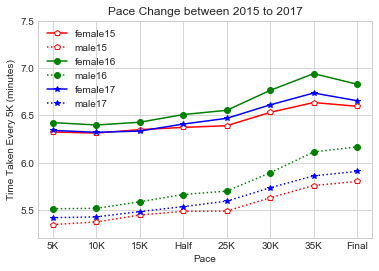

In [97]:
plt.figure() # setup figure
x = range(len(columns))
plt.plot(x, avg_f15[columns],'rp-', mfc='w', label = 'female15')
plt.plot(x, avg_m15[columns], 'rp:', mfc='w', label = 'male15')
plt.plot(x, avg_f16[columns],'go-', label = 'female16')
plt.plot(x, avg_m16[columns],'go:', label = 'male16')
plt.plot(x, avg_f17[columns], 'b*-', label = 'female17')
plt.plot(x, avg_m17[columns], 'b*:', label = 'male17')
y_columns = ['5K','10K','15K','Half','25K','30K','35K','Final']
plt.xticks(x, y_columns)
plt.ylim([5.2,7.5])
plt.xlabel('Pace') # apply labels
plt.ylabel('Time Taken Every 5K (minutes)')
plt.legend(loc='upper left')
plt.title('Pace Change between 2015 to 2017')
plt.savefig('pace changes 3 years.png',dpi = 500)
plt.show() # show figure

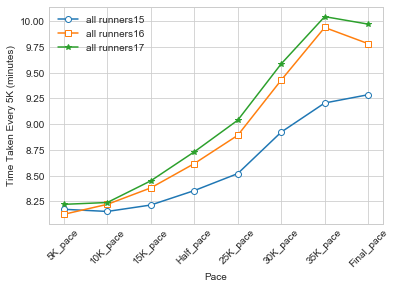

In [92]:
plt.figure() # setup figure
x = range(len(columns))
plt.plot(x, avg_all15[columns], marker = 'o',mfc='w',label = 'all runners15')
plt.plot(x, avg_all16[columns], marker = 's',mfc='w',label = 'all runners16')
plt.plot(x, avg_all17[columns], marker = '*', label = 'all runners17')
plt.xticks(x, columns, rotation=45)
plt.xlabel('Pace') # apply labels
plt.ylabel('Time Taken Every 5K (minutes)')
plt.legend(loc='best')
plt.savefig('pace changes all runners.jpg', dpi = 500)
plt.show() # show figure